In [5]:
import pandas as pd
import numpy as np
import json
from datetime import date
import calendar
import networkx as nx


{'ANDAMAN AND NICOBAR IS': 381,
 'ANDHRA PR': 84581,
 'ARUNACHAL PR': 1384,
 'CHAND': 1055,
 'CHHATTI': 25545,
 'DADRA AND NAGAR H': 344,
 'DAMAN AN': 243,
 'NCT OF ': 16788,
 'GU': 60440,
 'HA': 25351,
 'HIMACHAL PR': 6865,
 'JAMMU AND KA': 12541,
 'JHAR': 32988,
 'KARN': 61095,
 'K': 33406,
 'LAKSHA': 64,
 'MADHYA PR': 72627,
 'MAHARA': 112374,
 'MA': 2856,
 'MEGH': 2967,
 'MI': 1097,
 'NAG': 1979,
 'O': 41974,
 'PUDUC': 1248,
 'P': 27743,
 'RAJA': 68548,
 'TAMIL': 72147,
 'TR': 3674,
 'UTTAR PR': 199812,
 'UTTARA': 10086,
 'WEST B': 91276}

In [8]:
df2=pd.read_excel("INDIA.XLSX")
dic={}
df2
df2=df2.loc[(df2['Unnamed: 5'] == "All ages") & (df2["Unnamed: 4"]=="Total")& (df2["Unnamed: 6"]=="Total")]
df2
for index, row in df2.iterrows():
#     dic[row["Unnamed: 3"].lstrip("State -")[0:-5].upper()]=row["Unnamed: 7"]
    dic[row["Unnamed: 3"].lstrip("State -").upper()]=row["Unnamed: 7"]
#dic
dic["DELHI NCT"]=dic["NCT OF DELHI"]
dic["JAMMU AND KASHMIR"]=dic["JAMMU & KASHMIR"]
dic["SIKKIM"]=dic["IKKIM"]
dic.pop("IKKIM")
dic.pop("JAMMU & KASHMIR")
dic.pop("NCT OF DELHI")
dic

{'INDIA': 141908270,
 'ANDAMAN AND NICOBAR ISLANDS': 381,
 'ANDHRA PRADESH': 84581,
 'ARUNACHAL PRADESH': 1384,
 'ASSAM': 31206,
 'BIHAR': 104099,
 'CHANDIGARH': 1055,
 'CHHATTISGARH': 25545,
 'DADRA AND NAGAR HAVELI': 344,
 'DAMAN AND DIU': 243,
 'GOA': 1459,
 'GUJARAT': 60440,
 'HARYANA': 25351,
 'HIMACHAL PRADESH': 6865,
 'JHARKHAND': 32988,
 'KARNATAKA': 61095,
 'KERALA': 33406,
 'LAKSHADWEEP': 64,
 'MADHYA PRADESH': 72627,
 'MAHARASHTRA': 112374,
 'MANIPUR': 2856,
 'MEGHALAYA': 2967,
 'MIZORAM': 1097,
 'NAGALAND': 1979,
 'ODISHA': 41974,
 'PUDUCHERRY': 1248,
 'PUNJAB': 27743,
 'RAJASTHAN': 68548,
 'TAMIL NADU': 72147,
 'TRIPURA': 3674,
 'UTTAR PRADESH': 199812,
 'UTTARAKHAND': 10086,
 'WEST BENGAL': 91276,
 'DELHI NCT': 16788,
 'JAMMU AND KASHMIR': 12541,
 'SIKKIM': 611}

In [ ]:
df=pd.read_csv("Scraped.csv")
x=df["5"][6]
print(x)
df
passengers=[]
for i in range(len(df)):
    temp=0
    x=df["18"][i]
    x=x.replace("EOG","")
    #x=x.strip('][').split(',')
    if(len(x)>8):
        for j in x:
            if (j.startswith("D")):
                temp+=106
            if (j.startswith("H")):
                temp+=22
            if (j.startswith("B")):
                temp+=72
            if (j.startswith("S") or j.startswith("C")):
                temp+=80
            if (j.startswith("A") or j.startswith("E")):
                temp+=54
        if temp==0:
            print(x)
            y=x
        passengers.append(temp)
passengers=list(filter(lambda a: a != 0, passengers))


def df_states(df):
    for i in range(len(df)):
        x=df["19"][i]
        x=x.strip('][').split(',')
        for j in range(1,len(x),2):
            print(x[j])
#df_states(df)

In [5]:
print(sum(passengers)/len(passengers))

1592.4638140517698


In [6]:
#df_states(df)    

In [7]:
#_=x.strip('][').split(',')
dic_month={"Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,"Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12}



In [20]:
def create():
    lis=[*dic]
    df=pd.DataFrame(data=0,columns=lis, index = lis)
    return df
dfG=create()
def get_passengers(x):
    temp=0
    x=x.replace("EOG","")
    #x=x.strip('][').split(',')
    if(len(x)>8):
        for j in x:
            if (j.startswith("D")):
                temp+=106
            if (j.startswith("H")):
                temp+=22
            if (j.startswith("B")):
                temp+=72
            if (j.startswith("S") or j.startswith("C")):
                temp+=80
            if (j.startswith("A") or j.startswith("E")):
                temp+=54
    if temp>0:
        return temp
    else:
        return 1590
def get_weekdays(string):
    string=string.replace(" ","")
    #print(len(string), string)
    return len(string)
def separator(string):
    string=string[4:]
    dm,year=string.split(",")
    return dm,year[1:]

def checkruns_weight(row):      #Assumption: The end date is not in 2022. And the start date is either in 2020 or 2021
    s=row[21]
    e=row[22]
    days=0
    try:
        s,years=separator(s)
        e,yeare=separator(e)
        sm,sd=s.split(" ")
        em,ed=e.split(" ")
        sm=dic_month[sm]
        em=dic_month[em]
        date_s=date(int(years),int(sm),int(sd))
        date_e=date(int(yeare),int(em),int(ed))
        days=date_e-date_s
    except:
        try:
            sm,sd=s.split(" ")
            sm=dic_month[sm]
            date_e=date(2021,6,10)
            date_s=date(2021,int(sm),int(sd))
            days=date_e-date_s
        except:
            days=date(2021,6,10)-date(2021,6,10)

    days=days.days
    if days<0:       #365-days for total
        days=360+days
    runs=days/7*get_weekdays(row[14])*get_passengers(row[19])
    return runs
checkruns_weight(df.loc[6])                #
#get_weekdays(df.loc[0][14])
#get_passengers(df.loc[1][19])

426462.0

In [17]:
def separator(string):
    string=string[4:]
    dm,year=string.split(",")
    return dm,year[1:]


('Jul 01', '2021')

In [21]:
dfG=create()
for index,row in df.iterrows():                 
    x=row[20]
    x=x.strip('][').split(',')
    y=[]
    for i in range(1,len(x),2):
        var=x[i].strip(" '").upper()
        if var not in y:
            y.append(var)
        else:
            pass
    print(y)
    if "TELANGANA" in y:
        if "ANDHRA PRADESH" in y:
            y.remove("TELANGANA")
        else:
            dunno=y.index("TELANGANA")
            y[dunno]="ANDHRA PRADESH"
            
            
    temp=[]
    for i in y:
        try:
            temp.append(dic[i])
        except KeyError:
            if i =="TELANGANA":
                #temp.append(dic("ANDHRA PRADESH"))
                
                if "ANDHRA PRADESH" in y:
                    y.remove(i)
                else:
                    dunno=y.index("TELANGANA")
                    y[dunno]="ANDHRA PRADESH"
                    #print(y)
                    temp.append(dic["ANDHRA PRADESH"])
    print(y)
    print(temp)
    lis=[sum(temp[(i):len(temp)]) for i in range(len(y))]

    capacity=checkruns_weight(row)
    for i in range(len(y)-1):
        for j in range(i+1,len(y)):
            if (i==0):
                den=lis[i]-temp[i]          #Temp is the mig inside of i and and lis is from i to len(y)
                test=y[i]
                test=temp[j]
                dfG[y[i]][y[j]]+=temp[j]*capacity/den
            else:
                den2=lis[i]-temp[i]
                mult1=capacity*temp[i]/lis[i]
                mult2=temp[j]/den2
                dfG[y[i]][y[j]]+=mult1*mult2
            
                
            
#break

['KERALA', 'TAMIL NADU', 'ANDHRA PRADESH', 'TELANGANA', 'MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
['KERALA', 'TAMIL NADU', 'ANDHRA PRADESH', 'MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
[6010350, 10526724, 11096243, 20620198, 7947991, 14412965]
['HARYANA', 'CHANDIGARH', 'DELHI NCT']
['HARYANA', 'CHANDIGARH', 'DELHI NCT']
[3626260, 260786, 2600912]
['DELHI NCT', 'HARYANA', 'CHANDIGARH']
['DELHI NCT', 'HARYANA', 'CHANDIGARH']
[2600912, 3626260, 260786]
['PUNJAB', 'HARYANA', 'DELHI NCT']
['PUNJAB', 'HARYANA', 'DELHI NCT']
[3743486, 3626260, 2600912]
['DELHI NCT', 'HARYANA', 'PUNJAB']
['DELHI NCT', 'HARYANA', 'PUNJAB']
[2600912, 3626260, 3743486]
['DELHI NCT', 'HARYANA', 'PUNJAB', 'JAMMU AND KASHMIR']
['DELHI NCT', 'HARYANA', 'PUNJAB', 'JAMMU AND KASHMIR']
[2600912, 3626260, 3743486, 829109]
['JAMMU AND KASHMIR', 'PUNJAB', 'HARYANA', 'DELHI NCT']
['JAMMU AND KASHMIR', 'PUNJAB', 'HARYANA', 'DELHI NCT']
[829109, 3743486, 3626260, 2600912]
['RAJASTHAN', 'UTTAR PRADESH', 'BIHAR', 

['DELHI NCT', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA', 'TELANGANA', 'ANDHRA PRADESH', 'KARNATAKA', 'TAMIL NADU']
['DELHI NCT', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA', 'ANDHRA PRADESH', 'KARNATAKA', 'TAMIL NADU']
[2600912, 14412965, 7947991, 20620198, 11096243, 9197706, 10526724]
['TAMIL NADU', 'KARNATAKA', 'ANDHRA PRADESH', 'TELANGANA', 'MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'DELHI NCT']
['TAMIL NADU', 'KARNATAKA', 'ANDHRA PRADESH', 'MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'DELHI NCT']
[10526724, 9197706, 11096243, 20620198, 7947991, 14412965, 2600912]
['MAHARASHTRA', 'GOA', 'KARNATAKA', 'KERALA', 'TAMIL NADU']
['MAHARASHTRA', 'GOA', 'KARNATAKA', 'KERALA', 'TAMIL NADU']
[20620198, 435131, 9197706, 6010350, 10526724]
['TAMIL NADU', 'KERALA', 'KARNATAKA', 'GOA', 'MAHARASHTRA']
['TAMIL NADU', 'KERALA', 'KARNATAKA', 'GOA', 'MAHARASHTRA']
[10526724, 6010350, 9197706, 435131, 20620198]
['CHHATTISGARH', 'MAHARASHTRA', 'TELANGANA', 'ANDHRA PRADESH', 'TAMI

['DELHI NCT', 'UTTAR PRADESH', 'JHARKHAND']
['DELHI NCT', 'UTTAR PRADESH', 'JHARKHAND']
[2600912, 14412965, 2999009]
['JHARKHAND', 'BIHAR', 'UTTAR PRADESH', 'DELHI NCT']
['JHARKHAND', 'BIHAR', 'UTTAR PRADESH', 'DELHI NCT']
[2999009, 6909439, 14412965, 2600912]
['CHANDIGARH', 'HARYANA', 'UTTAR PRADESH', 'BIHAR', 'WEST BENGAL', 'ASSAM', 'NAGALAND']
['CHANDIGARH', 'HARYANA', 'UTTAR PRADESH', 'BIHAR', 'WEST BENGAL', 'ASSAM', 'NAGALAND']
[260786, 3626260, 14412965, 6909439, 8933321, 2896119, 254685]
['JHARKHAND', 'UTTAR PRADESH', 'DELHI NCT']
['JHARKHAND', 'UTTAR PRADESH', 'DELHI NCT']
[2999009, 14412965, 2600912]
['ASSAM', 'NAGALAND', 'WEST BENGAL', 'BIHAR', 'UTTAR PRADESH', 'HARYANA', 'CHANDIGARH']
['ASSAM', 'NAGALAND', 'WEST BENGAL', 'BIHAR', 'UTTAR PRADESH', 'HARYANA', 'CHANDIGARH']
[2896119, 254685, 8933321, 6909439, 14412965, 3626260, 260786]
['BIHAR']
['BIHAR']
[6909439]
['ASSAM', 'WEST BENGAL', 'BIHAR', 'JHARKHAND']
['ASSAM', 'WEST BENGAL', 'BIHAR', 'JHARKHAND']
[2896119, 8933321, 6

['MAHARASHTRA', 'GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'UTTAR PRADESH']
['MAHARASHTRA', 'GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'UTTAR PRADESH']
[20620198, 9521542, 7947991, 7219526, 14412965]
['BIHAR', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA', 'GUJARAT']
['BIHAR', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA', 'GUJARAT']
[6909439, 14412965, 7947991, 20620198, 9521542]
['GUJARAT', 'MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'BIHAR']
['GUJARAT', 'MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'BIHAR']
[9521542, 20620198, 7947991, 14412965, 6909439]
['UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT', 'MAHARASHTRA']
['UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT', 'MAHARASHTRA']
[14412965, 7219526, 7947991, 9521542, 20620198]
['BIHAR', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA', 'GUJARAT']
['BIHAR', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA', 'GUJARAT']
[6909439, 14412965, 7947991, 20620198, 9521542]
['MAHARASHTRA', 'GUJARAT', 'MADHYA

['UTTAR PRADESH', 'MADHYA PRADESH', 'RAJASTHAN']
['UTTAR PRADESH', 'MADHYA PRADESH', 'RAJASTHAN']
[14412965, 7947991, 7219526]
['RAJASTHAN', 'UTTAR PRADESH']
['RAJASTHAN', 'UTTAR PRADESH']
[7219526, 14412965]
['UTTAR PRADESH', 'RAJASTHAN']
['UTTAR PRADESH', 'RAJASTHAN']
[14412965, 7219526]
['UTTAR PRADESH']
['UTTAR PRADESH']
[14412965]
['UTTAR PRADESH']
['UTTAR PRADESH']
[14412965]
['MADHYA PRADESH']
['MADHYA PRADESH']
[7947991]
['MADHYA PRADESH']
['MADHYA PRADESH']
[7947991]
['MADHYA PRADESH']
['MADHYA PRADESH']
[7947991]
['MADHYA PRADESH']
['MADHYA PRADESH']
[7947991]
['MADHYA PRADESH']
['MADHYA PRADESH']
[7947991]
['MADHYA PRADESH']
['MADHYA PRADESH']
[7947991]
['MADHYA PRADESH', 'UTTAR PRADESH', 'DELHI NCT']
['MADHYA PRADESH', 'UTTAR PRADESH', 'DELHI NCT']
[7947991, 14412965, 2600912]
['DELHI NCT', 'UTTAR PRADESH', 'MADHYA PRADESH']
['DELHI NCT', 'UTTAR PRADESH', 'MADHYA PRADESH']
[2600912, 14412965, 7947991]
['JHARKHAND', 'ODISHA', 'CHHATTISGARH', 'MAHARASHTRA']
['JHARKHAND', 'ODI

['WEST BENGAL', 'ODISHA', 'ANDHRA PRADESH', 'TAMIL NADU', 'KERALA']
['WEST BENGAL', 'ODISHA', 'ANDHRA PRADESH', 'TAMIL NADU', 'KERALA']
[8933321, 4454572, 11096243, 10526724, 6010350]
['HARYANA', 'RAJASTHAN']
['HARYANA', 'RAJASTHAN']
[3626260, 7219526]
['RAJASTHAN', 'HARYANA']
['RAJASTHAN', 'HARYANA']
[7219526, 3626260]
['TRIPURA', 'ASSAM', 'WEST BENGAL', 'BIHAR', 'JHARKHAND']
['TRIPURA', 'ASSAM', 'WEST BENGAL', 'BIHAR', 'JHARKHAND']
[354081, 2896119, 8933321, 6909439, 2999009]
['BIHAR', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA', 'GUJARAT']
['BIHAR', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA', 'GUJARAT']
[6909439, 14412965, 7947991, 20620198, 9521542]
['MAHARASHTRA']
['MAHARASHTRA']
[20620198]
['MAHARASHTRA']
['MAHARASHTRA']
[20620198]
['BIHAR', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
['BIHAR', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
[6909439, 14412965, 7947991, 20620198]
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'BIHAR']
['MAHARASHTRA', 'MADHY

['WEST BENGAL']
['WEST BENGAL']
[8933321]
['WEST BENGAL']
['WEST BENGAL']
[8933321]
['WEST BENGAL']
['WEST BENGAL']
[8933321]
['WEST BENGAL']
['WEST BENGAL']
[8933321]
['WEST BENGAL']
['WEST BENGAL']
[8933321]
['WEST BENGAL']
['WEST BENGAL']
[8933321]
['WEST BENGAL']
['WEST BENGAL']
[8933321]
['WEST BENGAL']
['WEST BENGAL']
[8933321]
['JHARKHAND', 'WEST BENGAL']
['JHARKHAND', 'WEST BENGAL']
[2999009, 8933321]
['WEST BENGAL', 'JHARKHAND']
['WEST BENGAL', 'JHARKHAND']
[8933321, 2999009]
['JHARKHAND', 'WEST BENGAL']
['JHARKHAND', 'WEST BENGAL']
[2999009, 8933321]
['KERALA', 'TAMIL NADU', 'KARNATAKA']
['KERALA', 'TAMIL NADU', 'KARNATAKA']
[6010350, 10526724, 9197706]
['TAMIL NADU', 'KARNATAKA']
['TAMIL NADU', 'KARNATAKA']
[10526724, 9197706]
['KARNATAKA', 'TAMIL NADU']
['KARNATAKA', 'TAMIL NADU']
[9197706, 10526724]
['MAHARASHTRA', 'CHHATTISGARH', 'ODISHA', 'JHARKHAND', 'WEST BENGAL']
['MAHARASHTRA', 'CHHATTISGARH', 'ODISHA', 'JHARKHAND', 'WEST BENGAL']
[20620198, 3002954, 4454572, 2999009

['KARNATAKA', 'ANDHRA PRADESH', 'TELANGANA']
['KARNATAKA', 'ANDHRA PRADESH']
[9197706, 11096243]
['UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
['UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
[14412965, 7947991, 20620198]
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'BIHAR']
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'BIHAR']
[20620198, 7947991, 14412965, 6909439]
['BIHAR', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
['BIHAR', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
[6909439, 14412965, 7947991, 20620198]
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
[20620198, 7947991, 14412965]
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
[20620198, 7947991, 14412965]
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'BIHAR']
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'BIHAR']
[20620198, 7947991, 14412965, 6909439]
['UTTAR PRADESH', 'MADHYA PRAD

['UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
['UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
[14412965, 7947991, 20620198]
['GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'UTTAR PRADESH']
['GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'UTTAR PRADESH']
[9521542, 7947991, 7219526, 14412965]
['UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT']
['UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT']
[14412965, 7219526, 7947991, 9521542]
['DELHI NCT', 'UTTAR PRADESH', 'BIHAR']
['DELHI NCT', 'UTTAR PRADESH', 'BIHAR']
[2600912, 14412965, 6909439]
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'BIHAR', 'WEST BENGAL', 'ASSAM']
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'BIHAR', 'WEST BENGAL', 'ASSAM']
[20620198, 7947991, 14412965, 6909439, 8933321, 2896119]
['UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
['UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
[14412965, 7947991, 20620198]
['ASSAM', 'WEST BENGAL', 'BIHAR', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
['

['PUNJAB', 'HARYANA', 'UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL']
['PUNJAB', 'HARYANA', 'UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL']
[3743486, 3626260, 14412965, 6909439, 2999009, 8933321]
['BIHAR', 'JHARKHAND']
['BIHAR', 'JHARKHAND']
[6909439, 2999009]
['UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
['UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
[14412965, 7947991, 20620198]
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
[20620198, 7947991, 14412965]
['KARNATAKA']
['KARNATAKA']
[9197706]
['KARNATAKA']
['KARNATAKA']
[9197706]
['BIHAR', 'JHARKHAND', 'WEST BENGAL']
['BIHAR', 'JHARKHAND', 'WEST BENGAL']
[6909439, 2999009, 8933321]
['TAMIL NADU', 'ANDHRA PRADESH', 'ODISHA', 'JHARKHAND', 'WEST BENGAL']
['TAMIL NADU', 'ANDHRA PRADESH', 'ODISHA', 'JHARKHAND', 'WEST BENGAL']
[10526724, 11096243, 4454572, 2999009, 8933321]
['WEST BENGAL', 'JHARKHAND', 'BIHAR']
['WEST BENGAL', 'JHARKHAND', 'BIHAR']
[8933321, 2999009

['UTTAR PRADESH', 'RAJASTHAN']
['UTTAR PRADESH', 'RAJASTHAN']
[14412965, 7219526]
['PUNJAB', 'HARYANA', 'DELHI NCT']
['PUNJAB', 'HARYANA', 'DELHI NCT']
[3743486, 3626260, 2600912]
['DELHI NCT', 'HARYANA', 'PUNJAB']
['DELHI NCT', 'HARYANA', 'PUNJAB']
[2600912, 3626260, 3743486]
['RAJASTHAN', 'UTTAR PRADESH']
['RAJASTHAN', 'UTTAR PRADESH']
[7219526, 14412965]
['DELHI NCT', 'HARYANA', 'PUNJAB', 'RAJASTHAN']
['DELHI NCT', 'HARYANA', 'PUNJAB', 'RAJASTHAN']
[2600912, 3626260, 3743486, 7219526]
['UTTAR PRADESH', 'RAJASTHAN']
['UTTAR PRADESH', 'RAJASTHAN']
[14412965, 7219526]
['RAJASTHAN', 'PUNJAB', 'HARYANA', 'DELHI NCT']
['RAJASTHAN', 'PUNJAB', 'HARYANA', 'DELHI NCT']
[7219526, 3743486, 3626260, 2600912]
['UTTARAKHAND', 'UTTAR PRADESH', 'HARYANA', 'PUNJAB', 'RAJASTHAN']
['UTTARAKHAND', 'UTTAR PRADESH', 'HARYANA', 'PUNJAB', 'RAJASTHAN']
[1624197, 14412965, 3626260, 3743486, 7219526]
['RAJASTHAN', 'UTTAR PRADESH']
['RAJASTHAN', 'UTTAR PRADESH']
[7219526, 14412965]
['RAJASTHAN', 'HARYANA', 'PUN

['JHARKHAND', 'BIHAR']
['JHARKHAND', 'BIHAR']
[2999009, 6909439]
['BIHAR', 'UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA', 'CHANDIGARH', 'PUNJAB']
['BIHAR', 'UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA', 'CHANDIGARH', 'PUNJAB']
[6909439, 14412965, 1624197, 3626260, 260786, 3743486]
['PUNJAB', 'CHANDIGARH', 'HARYANA', 'UTTAR PRADESH', 'UTTARAKHAND', 'BIHAR']
['PUNJAB', 'CHANDIGARH', 'HARYANA', 'UTTAR PRADESH', 'UTTARAKHAND', 'BIHAR']
[3743486, 260786, 3626260, 14412965, 1624197, 6909439]
['BIHAR', 'UTTAR PRADESH', 'DELHI NCT']
['BIHAR', 'UTTAR PRADESH', 'DELHI NCT']
[6909439, 14412965, 2600912]
['DELHI NCT', 'UTTAR PRADESH', 'BIHAR']
['DELHI NCT', 'UTTAR PRADESH', 'BIHAR']
[2600912, 14412965, 6909439]
['GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'UTTAR PRADESH', 'BIHAR']
['GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'UTTAR PRADESH', 'BIHAR']
[9521542, 7947991, 7219526, 14412965, 6909439]
['BIHAR', 'UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT']
['BIHAR', 'UTTAR PRADESH', 'RAJASTHAN', 'MADH

['TAMIL NADU', 'ANDHRA PRADESH', 'ODISHA']
['TAMIL NADU', 'ANDHRA PRADESH', 'ODISHA']
[10526724, 11096243, 4454572]
['ODISHA', 'ANDHRA PRADESH', 'TAMIL NADU']
['ODISHA', 'ANDHRA PRADESH', 'TAMIL NADU']
[4454572, 11096243, 10526724]
['ODISHA', 'ANDHRA PRADESH', 'TAMIL NADU']
['ODISHA', 'ANDHRA PRADESH', 'TAMIL NADU']
[4454572, 11096243, 10526724]
['PUDUCHERRY', 'TAMIL NADU', 'ANDHRA PRADESH', 'ODISHA']
['PUDUCHERRY', 'TAMIL NADU', 'ANDHRA PRADESH', 'ODISHA']
[276741, 10526724, 11096243, 4454572]
['ODISHA', 'ANDHRA PRADESH', 'TAMIL NADU', 'PUDUCHERRY']
['ODISHA', 'ANDHRA PRADESH', 'TAMIL NADU', 'PUDUCHERRY']
[4454572, 11096243, 10526724, 276741]
['GUJARAT', 'MAHARASHTRA', 'TELANGANA', 'ANDHRA PRADESH']
['GUJARAT', 'MAHARASHTRA', 'ANDHRA PRADESH']
[9521542, 20620198, 11096243]
['ANDHRA PRADESH', 'TELANGANA', 'MAHARASHTRA', 'GUJARAT']
['ANDHRA PRADESH', 'MAHARASHTRA', 'GUJARAT']
[11096243, 20620198, 9521542]
['KARNATAKA', 'TAMIL NADU', 'ANDHRA PRADESH', 'ODISHA']
['KARNATAKA', 'TAMIL NADU'

['CHHATTISGARH', 'MADHYA PRADESH']
['CHHATTISGARH', 'MADHYA PRADESH']
[3002954, 7947991]
['CHHATTISGARH', 'MADHYA PRADESH']
['CHHATTISGARH', 'MADHYA PRADESH']
[3002954, 7947991]
['MAHARASHTRA', 'GUJARAT']
['MAHARASHTRA', 'GUJARAT']
[20620198, 9521542]
['GUJARAT', 'MAHARASHTRA']
['GUJARAT', 'MAHARASHTRA']
[9521542, 20620198]
['MAHARASHTRA', 'GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'DELHI NCT']
['MAHARASHTRA', 'GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'DELHI NCT']
[20620198, 9521542, 7947991, 7219526, 2600912]
['DELHI NCT', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT', 'MAHARASHTRA']
['DELHI NCT', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT', 'MAHARASHTRA']
[2600912, 7219526, 7947991, 9521542, 20620198]
['UTTAR PRADESH', 'MADHYA PRADESH', 'GUJARAT']
['UTTAR PRADESH', 'MADHYA PRADESH', 'GUJARAT']
[14412965, 7947991, 9521542]
['ASSAM', 'WEST BENGAL']
['ASSAM', 'WEST BENGAL']
[2896119, 8933321]
['GUJARAT', 'MAHARASHTRA', 'GOA', 'KARNATAKA', 'KERALA']
['GUJARAT', 'MAHARASHTRA', 'GOA', 'KARNATAKA', 

['MAHARASHTRA', 'GUJARAT', 'RAJASTHAN']
['MAHARASHTRA', 'GUJARAT', 'RAJASTHAN']
[20620198, 9521542, 7219526]
['TAMIL NADU']
['TAMIL NADU']
[10526724]
['BIHAR', 'UTTAR PRADESH', 'RAJASTHAN']
['BIHAR', 'UTTAR PRADESH', 'RAJASTHAN']
[6909439, 14412965, 7219526]
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'BIHAR']
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'BIHAR']
[20620198, 7947991, 14412965, 6909439]
['WEST BENGAL', 'JHARKHAND', 'BIHAR']
['WEST BENGAL', 'JHARKHAND', 'BIHAR']
[8933321, 2999009, 6909439]
['JHARKHAND', 'WEST BENGAL', 'BIHAR', 'UTTAR PRADESH']
['JHARKHAND', 'WEST BENGAL', 'BIHAR', 'UTTAR PRADESH']
[2999009, 8933321, 6909439, 14412965]
['UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL']
['UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL']
[14412965, 6909439, 2999009, 8933321]
['WEST BENGAL', 'BIHAR', 'ASSAM']
['WEST BENGAL', 'BIHAR', 'ASSAM']
[8933321, 6909439, 2896119]
['GUJARAT', 'MAHARASHTRA', 'CHHATTISGARH', 'ODISHA']
['GUJARAT', 'MAHARASHTRA', 'CHHAT

['RAJASTHAN', 'HARYANA', 'DELHI NCT', 'UTTAR PRADESH', 'PUNJAB', 'JAMMU AND KASHMIR']
['RAJASTHAN', 'HARYANA', 'DELHI NCT', 'UTTAR PRADESH', 'PUNJAB', 'JAMMU AND KASHMIR']
[7219526, 3626260, 2600912, 14412965, 3743486, 829109]
['KARNATAKA', 'TELANGANA']
['KARNATAKA', 'ANDHRA PRADESH']
[9197706, 11096243]
['WEST BENGAL', 'JHARKHAND', 'ODISHA', 'CHHATTISGARH', 'MAHARASHTRA', 'GUJARAT']
['WEST BENGAL', 'JHARKHAND', 'ODISHA', 'CHHATTISGARH', 'MAHARASHTRA', 'GUJARAT']
[8933321, 2999009, 4454572, 3002954, 20620198, 9521542]
['PUNJAB', 'HARYANA', 'DELHI NCT', 'UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL']
['PUNJAB', 'HARYANA', 'DELHI NCT', 'UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL']
[3743486, 3626260, 2600912, 14412965, 6909439, 2999009, 8933321]
['DELHI NCT', 'UTTAR PRADESH']
['DELHI NCT', 'UTTAR PRADESH']
[2600912, 14412965]
['TELANGANA', 'KARNATAKA']
['ANDHRA PRADESH', 'KARNATAKA']
[11096243, 9197706]
['CHHATTISGARH', 'MAHARASHTRA', 'MADHYA PRADESH', 'RAJASTHAN']
['CHHATTI

['ASSAM', 'WEST BENGAL', 'BIHAR', 'UTTAR PRADESH', 'DELHI NCT']
['ASSAM', 'WEST BENGAL', 'BIHAR', 'UTTAR PRADESH', 'DELHI NCT']
[2896119, 8933321, 6909439, 14412965, 2600912]
['DELHI NCT', 'UTTAR PRADESH', 'BIHAR', 'WEST BENGAL', 'ASSAM']
['DELHI NCT', 'UTTAR PRADESH', 'BIHAR', 'WEST BENGAL', 'ASSAM']
[2600912, 14412965, 6909439, 8933321, 2896119]
['TRIPURA', 'ASSAM', 'WEST BENGAL', 'BIHAR', 'UTTAR PRADESH', 'DELHI NCT']
['TRIPURA', 'ASSAM', 'WEST BENGAL', 'BIHAR', 'UTTAR PRADESH', 'DELHI NCT']
[354081, 2896119, 8933321, 6909439, 14412965, 2600912]
['DELHI NCT', 'UTTAR PRADESH', 'BIHAR', 'WEST BENGAL', 'ASSAM', 'TRIPURA']
['DELHI NCT', 'UTTAR PRADESH', 'BIHAR', 'WEST BENGAL', 'ASSAM', 'TRIPURA']
[2600912, 14412965, 6909439, 8933321, 2896119, 354081]
['DELHI NCT', 'PUNJAB', 'JAMMU AND KASHMIR']
['DELHI NCT', 'PUNJAB', 'JAMMU AND KASHMIR']
[2600912, 3743486, 829109]
['JAMMU AND KASHMIR', 'PUNJAB', 'DELHI NCT']
['JAMMU AND KASHMIR', 'PUNJAB', 'DELHI NCT']
[829109, 3743486, 2600912]
['DELH

['PUNJAB', 'HARYANA', 'UTTAR PRADESH', 'BIHAR', 'WEST BENGAL']
['PUNJAB', 'HARYANA', 'UTTAR PRADESH', 'BIHAR', 'WEST BENGAL']
[3743486, 3626260, 14412965, 6909439, 8933321]
['MAHARASHTRA', 'CHHATTISGARH', 'ODISHA', 'JHARKHAND', 'WEST BENGAL']
['MAHARASHTRA', 'CHHATTISGARH', 'ODISHA', 'JHARKHAND', 'WEST BENGAL']
[20620198, 3002954, 4454572, 2999009, 8933321]
['UTTAR PRADESH', 'DELHI NCT']
['UTTAR PRADESH', 'DELHI NCT']
[14412965, 2600912]
['DELHI NCT', 'HARYANA', 'UTTAR PRADESH', 'RAJASTHAN']
['DELHI NCT', 'HARYANA', 'UTTAR PRADESH', 'RAJASTHAN']
[2600912, 3626260, 14412965, 7219526]
['DELHI NCT', 'UTTAR PRADESH']
['DELHI NCT', 'UTTAR PRADESH']
[2600912, 14412965]
['RAJASTHAN', 'UTTAR PRADESH', 'HARYANA', 'DELHI NCT']
['RAJASTHAN', 'UTTAR PRADESH', 'HARYANA', 'DELHI NCT']
[7219526, 14412965, 3626260, 2600912]
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'BIHAR', 'WEST BENGAL', 'ASSAM']
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'BIHAR', 'WEST BENGAL', 'ASSAM']
[20620198, 7

['TELANGANA', 'MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'HARYANA', 'DELHI NCT']
['ANDHRA PRADESH', 'MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'HARYANA', 'DELHI NCT']
[11096243, 20620198, 7947991, 14412965, 3626260, 2600912]
['TELANGANA', 'ANDHRA PRADESH', 'ODISHA', 'WEST BENGAL']
['ANDHRA PRADESH', 'ODISHA', 'WEST BENGAL']
[11096243, 4454572, 8933321]
['GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'UTTAR PRADESH', 'BIHAR']
['GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'UTTAR PRADESH', 'BIHAR']
[9521542, 7947991, 7219526, 14412965, 6909439]
['UTTAR PRADESH', 'DELHI NCT', 'HARYANA']
['UTTAR PRADESH', 'DELHI NCT', 'HARYANA']
[14412965, 2600912, 3626260]
['HARYANA', 'DELHI NCT', 'UTTAR PRADESH']
['HARYANA', 'DELHI NCT', 'UTTAR PRADESH']
[3626260, 2600912, 14412965]
['DELHI NCT', 'UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT']
['DELHI NCT', 'UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT']
[2600912, 14412965, 7219526, 7947991, 9521542]
['KERALA']
['KERALA']
[6010

['UTTAR PRADESH', 'DELHI NCT']
['UTTAR PRADESH', 'DELHI NCT']
[14412965, 2600912]
['DELHI NCT', 'UTTAR PRADESH']
['DELHI NCT', 'UTTAR PRADESH']
[2600912, 14412965]
['UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA', 'TELANGANA', 'KARNATAKA', 'ANDHRA PRADESH']
['UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA', 'KARNATAKA', 'ANDHRA PRADESH']
[14412965, 7947991, 20620198, 9197706, 11096243]
['KARNATAKA', 'ANDHRA PRADESH', 'TELANGANA', 'MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
['KARNATAKA', 'ANDHRA PRADESH', 'MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
[9197706, 11096243, 20620198, 7947991, 14412965]
['RAJASTHAN', 'MADHYA PRADESH', 'MAHARASHTRA', 'TELANGANA', 'ANDHRA PRADESH', 'KARNATAKA']
['RAJASTHAN', 'MADHYA PRADESH', 'MAHARASHTRA', 'ANDHRA PRADESH', 'KARNATAKA']
[7219526, 7947991, 20620198, 11096243, 9197706]
['UTTAR PRADESH', 'DELHI NCT']
['UTTAR PRADESH', 'DELHI NCT']
[14412965, 2600912]
['KARNATAKA', 'ANDHRA PRADESH', 'TELANGANA', 'MAHARASHTRA', 'MADHYA PRADESH', 'RAJAST

['DELHI NCT', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA', 'KARNATAKA', 'ANDHRA PRADESH']
['DELHI NCT', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA', 'KARNATAKA', 'ANDHRA PRADESH']
[2600912, 14412965, 7947991, 20620198, 9197706, 11096243]
['KARNATAKA', 'MAHARASHTRA']
['KARNATAKA', 'MAHARASHTRA']
[9197706, 20620198]
['MAHARASHTRA', 'KARNATAKA']
['MAHARASHTRA', 'KARNATAKA']
[20620198, 9197706]
['ODISHA', 'ANDHRA PRADESH', 'CHHATTISGARH', 'MAHARASHTRA', 'GUJARAT']
['ODISHA', 'ANDHRA PRADESH', 'CHHATTISGARH', 'MAHARASHTRA', 'GUJARAT']
[4454572, 11096243, 3002954, 20620198, 9521542]
['GUJARAT', 'MAHARASHTRA', 'CHHATTISGARH', 'ODISHA', 'ANDHRA PRADESH']
['GUJARAT', 'MAHARASHTRA', 'CHHATTISGARH', 'ODISHA', 'ANDHRA PRADESH']
[9521542, 20620198, 3002954, 4454572, 11096243]
['ODISHA', 'ANDHRA PRADESH', 'TELANGANA', 'MAHARASHTRA', 'GUJARAT']
['ODISHA', 'ANDHRA PRADESH', 'MAHARASHTRA', 'GUJARAT']
[4454572, 11096243, 20620198, 9521542]
['GUJARAT', 'MAHARASHTRA', 'TELANGANA', 'ANDHRA PRADES

['WEST BENGAL', 'JHARKHAND', 'UTTAR PRADESH', 'MADHYA PRADESH']
['WEST BENGAL', 'JHARKHAND', 'UTTAR PRADESH', 'MADHYA PRADESH']
[8933321, 2999009, 14412965, 7947991]
['UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT', 'MAHARASHTRA']
['UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT', 'MAHARASHTRA']
[14412965, 7219526, 7947991, 9521542, 20620198]
['MADHYA PRADESH', 'MAHARASHTRA']
['MADHYA PRADESH', 'MAHARASHTRA']
[7947991, 20620198]
['MAHARASHTRA', 'GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'UTTAR PRADESH']
['MAHARASHTRA', 'GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'UTTAR PRADESH']
[20620198, 9521542, 7947991, 7219526, 14412965]
['MAHARASHTRA', 'MADHYA PRADESH']
['MAHARASHTRA', 'MADHYA PRADESH']
[20620198, 7947991]
['MADHYA PRADESH']
['MADHYA PRADESH']
[7947991]
['MADHYA PRADESH']
['MADHYA PRADESH']
[7947991]
['MADHYA PRADESH']
['MADHYA PRADESH']
[7947991]
['UTTAR PRADESH', 'MADHYA PRADESH', 'GUJARAT', 'MAHARASHTRA']
['UTTAR PRADESH', 'MADHYA PRADESH', 'GUJARAT', 'MAHARASH

['DELHI NCT', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT', 'MAHARASHTRA']
['DELHI NCT', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT', 'MAHARASHTRA']
[2600912, 7219526, 7947991, 9521542, 20620198]
['DELHI NCT', 'UTTAR PRADESH', 'BIHAR']
['DELHI NCT', 'UTTAR PRADESH', 'BIHAR']
[2600912, 14412965, 6909439]
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'DELHI NCT', 'HARYANA', 'PUNJAB']
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'DELHI NCT', 'HARYANA', 'PUNJAB']
[20620198, 7947991, 14412965, 2600912, 3626260, 3743486]
['PUNJAB', 'HARYANA', 'DELHI NCT', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
['PUNJAB', 'HARYANA', 'DELHI NCT', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
[3743486, 3626260, 2600912, 14412965, 7947991, 20620198]
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
[20620198, 7947991, 14412965]
['UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
['UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
[14412965, 794

['UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
['UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
[14412965, 7947991, 20620198]
['TELANGANA', 'KARNATAKA', 'MAHARASHTRA', 'GUJARAT']
['ANDHRA PRADESH', 'KARNATAKA', 'MAHARASHTRA', 'GUJARAT']
[11096243, 9197706, 20620198, 9521542]
['TELANGANA', 'ANDHRA PRADESH', 'TAMIL NADU']
['ANDHRA PRADESH', 'TAMIL NADU']
[11096243, 10526724]
['GUJARAT', 'MAHARASHTRA', 'KARNATAKA', 'TELANGANA']
['GUJARAT', 'MAHARASHTRA', 'KARNATAKA', 'ANDHRA PRADESH']
[9521542, 20620198, 9197706, 11096243]
['TAMIL NADU', 'ANDHRA PRADESH', 'TELANGANA']
['TAMIL NADU', 'ANDHRA PRADESH']
[10526724, 11096243]
['UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA', 'TELANGANA', 'ANDHRA PRADESH', 'TAMIL NADU', 'KERALA']
['UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA', 'ANDHRA PRADESH', 'TAMIL NADU', 'KERALA']
[14412965, 7947991, 20620198, 11096243, 10526724, 6010350]
['KERALA', 'TAMIL NADU', 'ANDHRA PRADESH', 'TELANGANA', 'MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
['KE

['ANDHRA PRADESH', 'ODISHA']
[11096243, 4454572]
['ODISHA', 'ANDHRA PRADESH']
['ODISHA', 'ANDHRA PRADESH']
[4454572, 11096243]
['MAHARASHTRA', 'GUJARAT']
['MAHARASHTRA', 'GUJARAT']
[20620198, 9521542]
['GUJARAT', 'MAHARASHTRA']
['GUJARAT', 'MAHARASHTRA']
[9521542, 20620198]
['GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL']
['GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL']
[9521542, 7947991, 7219526, 14412965, 6909439, 2999009, 8933321]
['DELHI NCT', 'UTTAR PRADESH', 'BIHAR']
['DELHI NCT', 'UTTAR PRADESH', 'BIHAR']
[2600912, 14412965, 6909439]
['KARNATAKA', 'GOA']
['KARNATAKA', 'GOA']
[9197706, 435131]
['GOA', 'KARNATAKA']
['GOA', 'KARNATAKA']
[435131, 9197706]
['TAMIL NADU', 'ANDHRA PRADESH']
['TAMIL NADU', 'ANDHRA PRADESH']
[10526724, 11096243]
['ANDHRA PRADESH', 'TAMIL NADU']
['ANDHRA PRADESH', 'TAMIL NADU']
[11096243, 10526724]
['TAMIL NADU', 'KERALA', 'ANDHRA PRADESH', 'ODISHA', 'WEST BENG

['ANDHRA PRADESH', 'TELANGANA']
['ANDHRA PRADESH']
[11096243]
['TELANGANA', 'MAHARASHTRA', 'CHHATTISGARH']
['ANDHRA PRADESH', 'MAHARASHTRA', 'CHHATTISGARH']
[11096243, 20620198, 3002954]
['TELANGANA', 'ANDHRA PRADESH']
['ANDHRA PRADESH']
[11096243]
['CHHATTISGARH', 'MAHARASHTRA', 'TELANGANA']
['CHHATTISGARH', 'MAHARASHTRA', 'ANDHRA PRADESH']
[3002954, 20620198, 11096243]
['MAHARASHTRA']
['MAHARASHTRA']
[20620198]
['MAHARASHTRA']
['MAHARASHTRA']
[20620198]
['KARNATAKA', 'KERALA', 'PUDUCHERRY']
['KARNATAKA', 'KERALA', 'PUDUCHERRY']
[9197706, 6010350, 276741]
['KERALA', 'PUDUCHERRY', 'KARNATAKA']
['KERALA', 'PUDUCHERRY', 'KARNATAKA']
[6010350, 276741, 9197706]
['TAMIL NADU']
['TAMIL NADU']
[10526724]
['TAMIL NADU']
['TAMIL NADU']
[10526724]
['TAMIL NADU', 'KERALA']
['TAMIL NADU', 'KERALA']
[10526724, 6010350]
['KERALA', 'TAMIL NADU']
['KERALA', 'TAMIL NADU']
[6010350, 10526724]
['TAMIL NADU']
['TAMIL NADU']
[10526724]
['TAMIL NADU']
['TAMIL NADU']
[10526724]
['TAMIL NADU', 'KERALA']
['TAM

['UTTAR PRADESH']
['UTTAR PRADESH']
[14412965]
['UTTAR PRADESH']
['UTTAR PRADESH']
[14412965]
['DELHI NCT', 'UTTAR PRADESH']
['DELHI NCT', 'UTTAR PRADESH']
[2600912, 14412965]
['UTTAR PRADESH', 'DELHI NCT']
['UTTAR PRADESH', 'DELHI NCT']
[14412965, 2600912]
['UTTAR PRADESH', 'DELHI NCT']
['UTTAR PRADESH', 'DELHI NCT']
[14412965, 2600912]
['DELHI NCT', 'UTTAR PRADESH']
['DELHI NCT', 'UTTAR PRADESH']
[2600912, 14412965]
['UTTAR PRADESH', 'DELHI NCT', 'HARYANA', 'CHANDIGARH']
['UTTAR PRADESH', 'DELHI NCT', 'HARYANA', 'CHANDIGARH']
[14412965, 2600912, 3626260, 260786]
['CHANDIGARH', 'HARYANA', 'DELHI NCT', 'UTTAR PRADESH']
['CHANDIGARH', 'HARYANA', 'DELHI NCT', 'UTTAR PRADESH']
[260786, 3626260, 2600912, 14412965]
['JHARKHAND', 'BIHAR', 'UTTAR PRADESH', 'DELHI NCT']
['JHARKHAND', 'BIHAR', 'UTTAR PRADESH', 'DELHI NCT']
[2999009, 6909439, 14412965, 2600912]
['DELHI NCT', 'UTTAR PRADESH', 'BIHAR', 'JHARKHAND']
['DELHI NCT', 'UTTAR PRADESH', 'BIHAR', 'JHARKHAND']
[2600912, 14412965, 6909439, 2

['TAMIL NADU']
['TAMIL NADU']
[10526724]
['KERALA', 'KARNATAKA', 'GOA', 'MAHARASHTRA', 'GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'UTTAR PRADESH', 'DELHI NCT']
['KERALA', 'KARNATAKA', 'GOA', 'MAHARASHTRA', 'GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'UTTAR PRADESH', 'DELHI NCT']
[6010350, 9197706, 435131, 20620198, 9521542, 7947991, 7219526, 14412965, 2600912]
['DELHI NCT', 'UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT', 'MAHARASHTRA', 'GOA', 'KARNATAKA', 'KERALA']
['DELHI NCT', 'UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT', 'MAHARASHTRA', 'GOA', 'KARNATAKA', 'KERALA']
[2600912, 14412965, 7219526, 7947991, 9521542, 20620198, 435131, 9197706, 6010350]
['KERALA', 'PUDUCHERRY']
['KERALA', 'PUDUCHERRY']
[6010350, 276741]
['KERALA', 'PUDUCHERRY']
['KERALA', 'PUDUCHERRY']
[6010350, 276741]
['TAMIL NADU', 'ANDHRA PRADESH']
['TAMIL NADU', 'ANDHRA PRADESH']
[10526724, 11096243]
['TAMIL NADU', 'KERALA']
['TAMIL NADU', 'KERALA']
[10526724, 6010350]
['KERALA', 'TAMIL NADU']
['K

['WEST BENGAL', 'JHARKHAND', 'BIHAR']
['WEST BENGAL', 'JHARKHAND', 'BIHAR']
[8933321, 2999009, 6909439]
['WEST BENGAL', 'BIHAR', 'JHARKHAND']
['WEST BENGAL', 'BIHAR', 'JHARKHAND']
[8933321, 6909439, 2999009]
['ANDHRA PRADESH', 'ODISHA', 'CHHATTISGARH']
['ANDHRA PRADESH', 'ODISHA', 'CHHATTISGARH']
[11096243, 4454572, 3002954]
['CHHATTISGARH', 'ODISHA', 'ANDHRA PRADESH']
['CHHATTISGARH', 'ODISHA', 'ANDHRA PRADESH']
[3002954, 4454572, 11096243]
['ANDHRA PRADESH', 'ODISHA']
['ANDHRA PRADESH', 'ODISHA']
[11096243, 4454572]
['ODISHA', 'ANDHRA PRADESH']
['ODISHA', 'ANDHRA PRADESH']
[4454572, 11096243]
['MAHARASHTRA', 'GOA']
['MAHARASHTRA', 'GOA']
[20620198, 435131]
['GOA', 'MAHARASHTRA']
['GOA', 'MAHARASHTRA']
[435131, 20620198]
['ASSAM', 'WEST BENGAL', 'BIHAR']
['ASSAM', 'WEST BENGAL', 'BIHAR']
[2896119, 8933321, 6909439]
['BIHAR', 'WEST BENGAL', 'ASSAM']
['BIHAR', 'WEST BENGAL', 'ASSAM']
[6909439, 8933321, 2896119]
['ASSAM']
['ASSAM']
[2896119]
['MAHARASHTRA', 'KARNATAKA']
['MAHARASHTRA', '

['TAMIL NADU', 'ANDHRA PRADESH', 'TELANGANA']
['TAMIL NADU', 'ANDHRA PRADESH']
[10526724, 11096243]
['TELANGANA']
['ANDHRA PRADESH']
[11096243]
['ANDHRA PRADESH', 'TAMIL NADU']
['ANDHRA PRADESH', 'TAMIL NADU']
[11096243, 10526724]
['TAMIL NADU', 'ANDHRA PRADESH']
['TAMIL NADU', 'ANDHRA PRADESH']
[10526724, 11096243]
['ANDHRA PRADESH']
['ANDHRA PRADESH']
[11096243]
['ANDHRA PRADESH']
['ANDHRA PRADESH']
[11096243]
['MAHARASHTRA', 'GUJARAT', 'RAJASTHAN']
['MAHARASHTRA', 'GUJARAT', 'RAJASTHAN']
[20620198, 9521542, 7219526]
['WEST BENGAL', 'BIHAR', 'UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA', 'PUNJAB', 'JAMMU AND KASHMIR']
['WEST BENGAL', 'BIHAR', 'UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA', 'PUNJAB', 'JAMMU AND KASHMIR']
[8933321, 6909439, 14412965, 1624197, 3626260, 3743486, 829109]
['PUNJAB', 'HARYANA', 'UTTAR PRADESH', 'UTTARAKHAND']
['PUNJAB', 'HARYANA', 'UTTAR PRADESH', 'UTTARAKHAND']
[3743486, 3626260, 14412965, 1624197]
['UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA', 'PUNJAB']
['UTTAR PRADE

['RAJASTHAN', 'MADHYA PRADESH', 'MAHARASHTRA', 'TELANGANA', 'ANDHRA PRADESH', 'TAMIL NADU']
['RAJASTHAN', 'MADHYA PRADESH', 'MAHARASHTRA', 'ANDHRA PRADESH', 'TAMIL NADU']
[7219526, 7947991, 20620198, 11096243, 10526724]
['MAHARASHTRA', 'CHHATTISGARH', 'ODISHA', 'JHARKHAND']
['MAHARASHTRA', 'CHHATTISGARH', 'ODISHA', 'JHARKHAND']
[20620198, 3002954, 4454572, 2999009]
['MAHARASHTRA', 'GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'UTTAR PRADESH']
['MAHARASHTRA', 'GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'UTTAR PRADESH']
[20620198, 9521542, 7947991, 7219526, 14412965]
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
[20620198, 7947991, 14412965]
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
[20620198, 7947991, 14412965]
['MAHARASHTRA', 'GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'UTTAR PRADESH', 'BIHAR']
['MAHARASHTRA', 'GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'UTTAR PRADESH', 'BIHAR']
[2

In [22]:
f=[2896119, 8933321, 6909439, 14412965, 2600912, 3626260, 7219526]
[sum(f[(i):len(f)]) for i in range(len(y))]

[46598542, 43702423, 34769102, 27859663, 13446698]

In [23]:
dfG["RAJASTHAN"]["HIMACHAL PRADESH"]

15649

In [24]:
dfG

,HIMACHAL PRADESH,PUNJAB,CHANDIGARH,UTTARAKHAND,HARYANA,RAJASTHAN,UTTAR PRADESH,BIHAR,ARUNACHAL PRADESH,NAGALAND,...,KARNATAKA,GOA,LAKSHADWEEP,KERALA,TAMIL NADU,PUDUCHERRY,ANDAMAN & NICOBAR ISLANDS,DELHI NCT,JAMMU AND KASHMIR,SIKKIM
HIMACHAL PRADESH,0,876030,6260,0,777098,15649,0,0,0,0,...,0,0,0,0,0,0,0,103591,0,0
PUNJAB,387622,0,50902,219179,3092149,2010875,841475,90130,0,0,...,116,0,0,0,718,0,0,2316268,902565,0
CHANDIGARH,14078,9135,0,17576,1717548,4430,41264,2434,0,4,...,0,0,0,0,0,0,0,84998,5342,0
UTTARAKHAND,0,44645,47143,0,94882,95600,6772337,70319,0,0,...,50,2,0,311,0,0,0,765597,38243,0
HARYANA,1202021,2856950,259586,397020,0,5116465,1994972,117414,0,59,...,112,0,0,0,696,0,0,3827052,747173,0
RAJASTHAN,70636,2020228,2270,278152,3193698,0,2294727,161214,0,0,...,458,21051,0,2945,34304,0,0,2770541,184260,0
UTTAR PRADESH,0,709831,449261,5717862,1004723,1993843,0,5090480,0,239,...,133564,10451,0,26055,114233,0,0,7474747,878366,0
BIHAR,0,125682,43325,308428,36607,238120,5431461,0,0,118,...,24679,165,0,9252,28648,0,0,529502,59058,0
ARUNACHAL PRADESH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NAGALAND,0,0,520,0,56,0,437,616,0,0,...,0,0,0,0,4,0,0,0,0,0


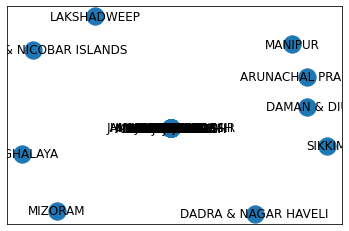

In [25]:
G=nx.from_pandas_adjacency(dfG)
nx.write_gml(G,"Post_Cov_Mig_T.gml")
nx.draw_networkx(G)


In [28]:
df1 = pd.read_csv('Statelatlong.csv',header = None , names =['node', 'latitude', 'longitude'])
lis=[]
for ind in df1.index:
    df1.loc[ind, ('node')]=df1['node'][ind].upper()
    
    lis.append(df1['node'][ind].upper())
lis
lis2=list(G.nodes())
for i in list(G.nodes()):
    temp=df1.loc[df1['node'] == i]
    try:
        G.nodes[i]["longitude"]=temp.iloc[0]["longitude"]
        G.nodes[i]["latitude"]=temp.iloc[0]["latitude"]
    except:
        pass

In [12]:
G.nodes.data()


NameError: name 'G' is not defined

In [30]:
nx.write_gml(G,"Post_Cov_Mig_T.gml")

NameError: name 'G' is not defined